# Image Processing in Python

## Introduction

Yesterday, we gave a brief overview of Python and three powerful libraries we will be using to develop for DeepCell. Today, we will become more familiar with SciPy and in particular the `scikit-image` library as we review the basics of image processing using Python. <i> NB: scikit-image has a description of tag `skimage` that can be used interchageably with the offical name.</i>

In this tutorial, we will cover:

* Loading & Handling Image Data: Input/output, Data Types, and Colorspaces
* Preprocessing: Contrast Adjustment
* Thresholding: Manual and Adaptive
* Filtering, Edge Detection, and Convolutions
* Mathematical Morphology and the Watershed Transform
* Affine Transformations

## Loading and Handling Image Data

`skimage` has a number of useful functions we can import to load and manipulate images, as well as save the resulting images. Remember, though, this library builds on NumPy, so we will need to import that library as well.

In [18]:
import numpy as np

from skimage.io import imread, imsave
from skimage.transform import resize as imresize

# Read an JPEG image into a numpy array
#img = imread('resources/img_000000000_Phase_000.png')
img = imread('resources/cat.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
imsave('resources/cat_tinted.jpg', np.uint8(img_tinted))


uint8 (400, 248, 3)


/home/emoen/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Rather than "hardcoding" the file path, a more robust way of handling these operations is to designate a section of code to specify the directory path and file name as variables. 

If the file is not in the current working directory, you must also have a way of specifying the path to the directory where the file is stored. In our case, the example images are stored in the directory called 'resources' in the same folder as this notebook. Note that you can use either the full path - something like r"/home/user/bootcamp/intro-to-deepcell/resources/example_cells_1.tif" or the relative path, starting from the current working directory.

NB: Paths and filenames can contain slashes, empty spaces and other special symbols, which can cause trouble for programming languages under certain circumstances. To circumvent such trouble, add the letter r before your string definition to create a so-called 'raw string', which is not affected by these problems (e.g. `my_raw_string = r"some string with funny symbols: \\\!/~***!"`).

In [19]:
# Create a string variable with the name of the file you'd like to load (here: 'example_cells_1.tif').
# Suggested name for the variable: filename
filename = r'img_000000000_Phase_000.png'

# Create a string variable with the path to the directory that contains the file you'd like to load.
# Suggested name for the variable: dirpath
dirpath = r'resources'  # Relative path
#dirpath = r'/home/user/bootcamp/intro-to-deepcell/resources/img_000000000_Phase_000.png'  # Absolute path 

In [20]:
# Now combine the directory path and file name into one variable, the file path

# Import the function 'join' from the module 'os.path'
# This function automatically takes care of the slashes that need to be added when combining two paths.
from os.path import join

# Print the result to see that everything is correct
# Suggested name for the variable: filepath
filepath = join(dirpath, filename)
print(filepath)

resources/img_000000000_Phase_000.png


With the file path established, we can load the image (using the `imread` function we imported earlier), make sure the load was successful, and display the image.

In [21]:
# Load 'img_000000000_Phase_000.png' and store it in a variable.
# Suggested name for the variable: img
img = imread(filepath)

In [22]:
# Check that the load went as expected

# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print("Loaded array is of type:", type(img))

# Print the shape of the array using the numpy-function 'shape'. 
print("Loaded array has shape:", img.shape)

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print("Loaded values are of type:", img.dtype)

Loaded array is of type: <class 'numpy.ndarray'>
Loaded array has shape: (1080, 1280)
Loaded values are of type: uint16


NB: The dtype should be 'uint16', because these are unsigned 16-bit integer images. Another common dtype for images is uint8. You can read more about the differences [here](https://www.mathworks.com/help/matlab/creating_plots/working-with-8-bit-and-16-bit-images.html) and [here](https://printaura.com/8-bit-vs-16-bit-images-whats-the-difference-which-to-use/)

Now we're ready to take a look at images. To plot the array as an image, use pyplot's functions `plt.imshow` followed by `plt.show`. 

You can check the documentation for `plt.imshow` and note the parameters that can be specified, such as colormap (cmap)
and interpolation. Since we are working with scientific data, interpolation is unwelcome, so you should set it to "none". The most common cmap for grayscale images is naturally "gray". You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with the function `plt.figure` before calling `plt.imshow`. The canvas size is adjusted using the keyword argument 'figsize' when calling `plt.figure`.

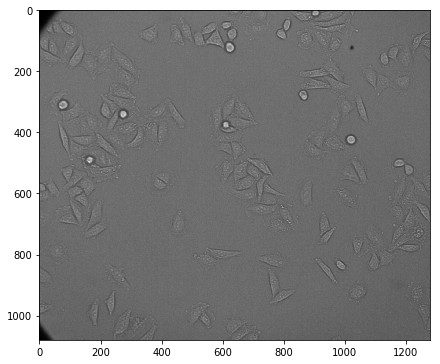

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(img, interpolation='none', cmap='gray')
plt.show()

Here is a side-by-sdie example using our cat image from ealier:

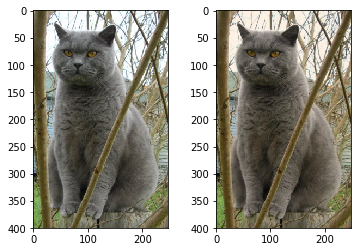

In [25]:
img2 = imread('resources/cat.jpg')
img_tinted2 = img2 * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img2)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results if presented with data that is not uint8. 
# To work around this, we explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted2))
plt.show()

## Preprocessing

Dylan Discussion Here

### Contrast Adjustment

In [14]:
#Dylan Code Here
#Needed for Thresholding to Work Correctly

## Thresholding

### Manual Thresholding & Threshold Detection

In [41]:
# Create a variable (int) to hold a threshold value, which can be changed later to something more suitable.
thresh = 70

# Recall that relational (Boolean) expressions, such as 'smaller' (<), 'equal' (==) or 'greater or equal' (>=),
# can be used with numpy arrays to directly assign the result to a new variable.
mem = img > thresh

# Check the dtype of your thresholded image - it should be boolean, meaning an array filled with 'True' and 'False',
# where 'True' is the foreground (regions above the threshold) and 'False' is the background.
print(mem.dtype)

bool


Let's take a look at the result. 

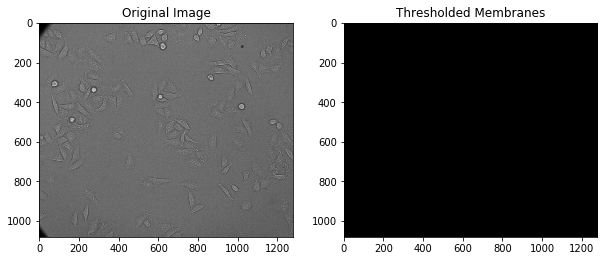

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(img, interpolation='none', cmap='gray')
ax[1].imshow(mem, interpolation='none', cmap='gray')
ax[0].set_title('Original Image')
ax[1].set_title('Thresholded Membranes')
plt.show()

Now, we can iterate through various threshold values to select something more appropriate. To do so interactively, we will utilize a class of interactive functions called 'widgets.' These are incredibly useful in exploratory data analysis to create simplified 'User Interfaces' (UIs) on the fly.

In [45]:
# Prepare widget
from ipywidgets import interact
@interact(thresh=(10,250,10))
def select_threshold(thresh=100):
    
    # Thresholding
    mem = img > thresh
    
    # Visualization
    plt.figure(figsize=(7,7))
    plt.imshow(mem, interpolation='none', cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=100, description='thresh', max=250, min=10, step=10), Output()), _dom_cl…

## Writing Output to Files

### Images

### NPZ

### JSON